In [1]:
%cd D:\4900\all-rnr-annotated-threads

D:\4900\all-rnr-annotated-threads


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

folds= ['charliehebdo-all-rnr-threads','ottawashooting-all-rnr-threads',
'ebola-essien-all-rnr-threads','prince-toronto-all-rnr-threads',
'ferguson-all-rnr-threads',	'putinmissing-all-rnr-threads',
'germanwings-crash-all-rnr-threads',
'gurlitt-all-rnr-threads','sydneysiege-all-rnr-threads']


texts = []
fav_counts = []
retweet_counts = []
date = []

username = []
account_date = []
protected = []
verified = []
followers = []
followings = []
tweets_count = []

hashtag = []
url = []

events = []
y = []

def convert_annotations_data(annotation, string = True):
    if 'misinformation' in annotation.keys() and 'true'in annotation.keys():
        if int(annotation['misinformation'])==0 and int(annotation['true'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==0 and int(annotation['true'])==1 :
            if string:
                label = "true"
            else:
                label = 1
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==0 :
            if string:
                label = "false"
            else:
                label = 0
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==1:
            print ("OMG! They both are 1!")
            print(annotation['misinformation'])
            print(annotation['true'])
            label = None
            
    elif 'misinformation' in annotation.keys() and 'true' not in annotation.keys():
        # all instances have misinfo label but don't have true label
        if int(annotation['misinformation'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==1:
            if string:
                label = "false"
            else:
                label = 0
                
    elif 'true' in annotation.keys() and 'misinformation' not in annotation.keys():
        print ('Has true not misinformation')
        label = None
    else:
        print('No annotations')
        label = None
           
    return label

In [3]:
for f in folds:
  path1 = os.path.join(f, 'rumours')
  for dir1 in os.listdir(path1):
        if '_' not in dir1:
          path_target  = os.path.join(path1,dir1,'annotation.json')
          file = open(path_target)
          data = json.load(file)
          target = convert_annotations_data(data)
          y.append(target)
          path2 = os.path.join(path1, dir1,'source-tweets')
          for dir2 in os.listdir(path2):
            if '_' not in dir2:
              path3  = os.path.join(path2,dir2)
              file = open(path3)
              data = json.load(file)
            
              #tweet features
              text = data['text']
              tweet_date = data['created_at']
              fav = data['favorite_count']
              retw = data['retweet_count']
                
              #user features
              usernames = data['user']['screen_name']
              account_creation = data['user']['created_at']
              is_protected = data['user']['protected']
              is_verified = data['user']['verified']
              no_followers = data['user']['followers_count']
              no_followings = data['user']['friends_count']
              no_tweets = data['user']['statuses_count']
                
              #entities
              no_hashtags = len(data['entities']['hashtags'])      
              has_url = data['entities']['urls']      
   

              texts.append(text)
              date.append(tweet_date)
              fav_counts.append(fav)
              retweet_counts.append(retw)
                                     
              username.append(usernames)
              account_date.append(account_creation)
              protected.append(is_protected)
              verified.append(is_verified)
              followers.append(no_followers)
              followings.append(no_followings)
              tweets_count.append(no_tweets)
            
              
              hashtag.append(no_hashtags)
              url.append(has_url)
            
              events.append(f)

In [4]:
df = pd.DataFrame([texts,date,fav_counts,retweet_counts,username,account_date,followers,followings,tweets_count,protected,verified,hashtag,url,events,y],['text','date','fav_count','retweet_count','username','account_date','followers','followings','tweet_count','protected','verified','no_hashtags','urls','event','target']).transpose()
df = df.infer_objects()
df.head(5)

,text,date,fav_count,retweet_count,username,account_date,followers,followings,tweet_count,protected,verified,no_hashtags,urls,event,target
0,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,14,159,H_E_Samuel,Tue Oct 04 09:36:17 +0000 2011,1628,246,1901,False,False,0,[],charliehebdo-all-rnr-threads,true
1,France: 10 people dead after shooting at HQ of...,Wed Jan 07 11:07:51 +0000 2015,38,486,euronews,Wed Mar 18 12:57:11 +0000 2009,129573,337,48440,False,True,1,[],charliehebdo-all-rnr-threads,true
2,Ten killed in shooting at headquarters of Fren...,Wed Jan 07 11:08:09 +0000 2015,15,127,Channel4News,Mon Apr 28 14:29:37 +0000 2008,529882,3051,66682,False,True,1,[],charliehebdo-all-rnr-threads,true
3,BREAKING: 10 dead in shooting at headquarters ...,Wed Jan 07 11:09:50 +0000 2015,15,105,AlArabiya_Eng,Sat Feb 28 08:31:32 +0000 2009,499741,31,100466,False,True,2,[],charliehebdo-all-rnr-threads,true
4,Reuters: 10 people shot dead at headquarters o...,Wed Jan 07 11:11:16 +0000 2015,32,412,SkyNewsBreak,Wed Nov 04 11:25:45 +0000 2009,1377384,6,27228,False,True,1,[],charliehebdo-all-rnr-threads,true


In [5]:
mask = df['target'] != 'unverified'
df = df[mask]
array = ['false','true']
df_transform = pd.DataFrame(array,columns=['status'])
status_dict = df_transform['status'].unique().tolist()
df['target']=df['target'].apply(lambda x : status_dict.index(x))
display(df)

,text,date,fav_count,retweet_count,username,account_date,followers,followings,tweet_count,protected,verified,no_hashtags,urls,event,target
0,"Breaking: At least 10 dead, 5 injured after tO...",Wed Jan 07 11:06:08 +0000 2015,14,159,H_E_Samuel,Tue Oct 04 09:36:17 +0000 2011,1628,246,1901,False,False,0,[],charliehebdo-all-rnr-threads,1
1,France: 10 people dead after shooting at HQ of...,Wed Jan 07 11:07:51 +0000 2015,38,486,euronews,Wed Mar 18 12:57:11 +0000 2009,129573,337,48440,False,True,1,[],charliehebdo-all-rnr-threads,1
2,Ten killed in shooting at headquarters of Fren...,Wed Jan 07 11:08:09 +0000 2015,15,127,Channel4News,Mon Apr 28 14:29:37 +0000 2008,529882,3051,66682,False,True,1,[],charliehebdo-all-rnr-threads,1
3,BREAKING: 10 dead in shooting at headquarters ...,Wed Jan 07 11:09:50 +0000 2015,15,105,AlArabiya_Eng,Sat Feb 28 08:31:32 +0000 2009,499741,31,100466,False,True,2,[],charliehebdo-all-rnr-threads,1
4,Reuters: 10 people shot dead at headquarters o...,Wed Jan 07 11:11:16 +0000 2015,32,412,SkyNewsBreak,Wed Nov 04 11:25:45 +0000 2009,1377384,6,27228,False,True,1,[],charliehebdo-all-rnr-threads,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,Police confirm that #sydneysiege is finally ov...,Mon Dec 15 15:52:04 +0000 2014,133,110,Angus_OL,Wed Dec 30 23:59:26 +0000 2009,90208,623,34310,False,True,1,[],sydneysiege-all-rnr-threads,1
2398,"Sad end: 2 people are dead, 3 in serious condi...",Mon Dec 15 15:53:35 +0000 2014,38,252,HalaGorani,Thu Mar 19 16:41:46 +0000 2009,143771,626,10364,False,True,1,[],sydneysiege-all-rnr-threads,1
2399,Seven people reportedly taken away on stretche...,Mon Dec 15 15:54:41 +0000 2014,46,167,SkyNews,Thu Jul 19 14:42:53 +0000 2007,1731616,17,120340,False,True,1,"[{'url': 'http://t.co/mZ1o7Bi9kC', 'indices': ...",sydneysiege-all-rnr-threads,1
2400,BREAKING: CNN: Sydney police storm cafe. 2 con...,Mon Dec 15 15:55:31 +0000 2014,26,117,AnneBayefsky,Tue Jul 26 19:02:54 +0000 2011,104665,52542,8066,False,False,0,"[{'url': 'http://t.co/FBnfHqKkeP', 'indices': ...",sydneysiege-all-rnr-threads,1


In [6]:
print(df.shape)
df.isna().sum()

(1705, 15)


text             0
date             0
fav_count        0
retweet_count    0
username         0
account_date     0
followers        0
followings       0
tweet_count      0
protected        0
verified         0
no_hashtags      0
urls             0
event            0
target           0
dtype: int64

,text,target
0,MORE: 3rd person runs out a fire exit of a Syd...,1
1,"Uber says it has hiked prices in Sydney to ""en...",1
2,DEVELOPING: Airspace shutdown over Sydney amid...,0
3,"Police seem relaxed, suggesting all hostages a...",1
4,Sydney siege: police enter cafe as hostages fl...,1
...,...,...
1700,A picture of the gunman inside Lindt cafe at M...,1
1701,#breaking Airbus A320 crashes in southern Fran...,0
1702,Here's everything we know so far about the #sy...,1
1703,Heavy police activity at Sydney cafe shown on ...,1


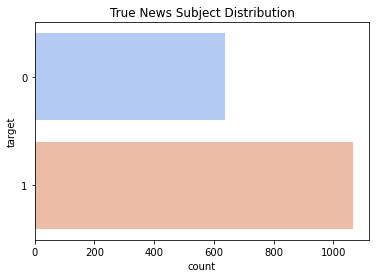

In [7]:
from sklearn.utils import shuffle

df = df[~df['text'].isna()][['text','target']]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)
sns.countplot(y="target", palette="coolwarm", data=df).set_title('True News Subject Distribution')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1705 non-null   object
 1   target  1705 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.8+ KB


In [9]:
df.drop_duplicates(subset=['text'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1699 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1699 non-null   object
 1   target  1699 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.8+ KB


In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import re
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
list_of_words = []

for title in df['text'].dropna():
    title = re.sub(r'http\S+', '', title)
    title = re.sub(r'www\S+', '', title)
    word = re.sub('[^a-zA-Z]', ' ', title)
    word = word.lower()
    word = word.split()
    word = [lemmatizer.lemmatize(w) for w in word if not w in stop_words]
    word = ' '.join(word)
    list_of_words.append(word)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dengsong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dengsong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dengsong\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
unique_words = list(set(word for sentence in list_of_words for word in sentence.split()))
voc_size = len(unique_words)

In [12]:
titles = [text for text in list_of_words]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))
print('Median length of the titles:', np.median(titles_len))

Number of titles: 1699
Max length of the titles: 18
Mean length of the titles: 10.334902884049441
Median length of the titles: 10.0


In [13]:
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words

tokenizer = Tokenizer(num_words = voc_size)
tokenizer.fit_on_texts(list_of_words)

sequences = tokenizer.texts_to_sequences(list_of_words)
padded_df = pad_sequences(sequences,maxlen = max_len, padding = 'pre', truncating = 'post')


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization, SpatialDropout1D
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
## Creating model Using LSTM

embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=max_len))
model.add(Dropout(0.3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [15]:
from sklearn.model_selection import train_test_split
z =np.array(padded_df)
y =np.array(df['target'])
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.20, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42)


Epoch 1/3
19/19 [==============================] - 4s 45ms/step - loss: 0.6804 - accuracy: 0.6123 - val_loss: 0.6572 - val_accuracy: 0.6353
Epoch 2/3
19/19 [==============================] - 0s 6ms/step - loss: 0.6533 - accuracy: 0.6182 - val_loss: 0.6385 - val_accuracy: 0.6353
Epoch 3/3
19/19 [==============================] - 0s 6ms/step - loss: 0.5920 - accuracy: 0.6182 - val_loss: 0.5567 - val_accuracy: 0.6353


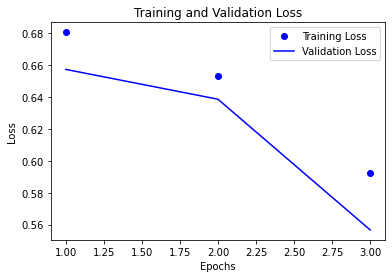

In [16]:
import time

# Training the model
start_time = time.time()
history = model.fit(x_train, y_train, batch_size = 64, validation_data=(x_val, y_val), epochs = 3)
end_time = time.time()
training_time = end_time - start_time
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss)+1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

11/11 [==============================] - 1s 1ms/step
CNN-BiLSTM Model Accuracy :  0.65
Precision :  0.65
Recall :  1.0
F1 :  0.787878787878788
G-mean: 0.0
Training time:  4.670083522796631
Inference time:  0.6789603233337402
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       119
           1       0.65      1.00      0.79       221

    accuracy                           0.65       340
   macro avg       0.33      0.50      0.39       340
weighted avg       0.42      0.65      0.51       340



C:\Users\Dengsong\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dengsong\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dengsong\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dengsong\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undef

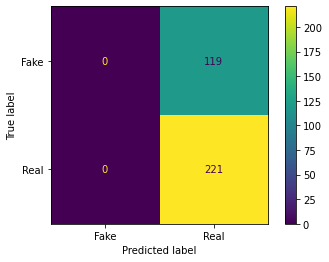

In [17]:
# Making prediction
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score
from scipy.stats import gmean
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
start_time = time.time()
prediction=(model.predict(x_test) > 0.5).astype("int32")
end_time = time.time()
inference_time = end_time - start_time
accuracy = accuracy_score(list(y_test), prediction)
cm = confusion_matrix(list(y_test), prediction)
g_mean = geometric_mean_score(y_test, prediction)
print("CNN-BiLSTM Model Accuracy : ", accuracy)
print("Precision : ", precision_score(list(y_test), prediction))
print("Recall : ", recall_score(list(y_test), prediction))
print("F1 : ", f1_score(list(y_test), prediction))
print("G-mean:", g_mean)
print("Training time: ", training_time)
print("Inference time: ", inference_time)
print(classification_report(y_test, prediction))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','Real'])
disp.plot()